In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\aadit\Downloads\listings.csv")

In [3]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250105040826,2025-01-05,previous scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.42
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.64,NaN,f,2,1,1,0,3.14
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.82
4,9005989,https://www.airbnb.com/rooms/9005989,20250105040826,2025-01-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.93,4.87,4.78,NaN,f,1,1,0,0,5.90


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            429 non-null    int64  
 1   listing_url                                   429 non-null    object 
 2   scrape_id                                     429 non-null    int64  
 3   last_scraped                                  429 non-null    object 
 4   source                                        429 non-null    object 
 5   name                                          429 non-null    object 
 6   description                                   422 non-null    object 
 7   neighborhood_overview                         213 non-null    object 
 8   picture_url                                   429 non-null    object 
 9   host_id                                       429 non-null    int

In [5]:
df.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
                                                ..
calculated_host_listings_count                   0
calculated_host_listings_count_entire_homes      0
calculated_host_listings_count_private_rooms     0
calculated_host_listings_count_shared_rooms      0
reviews_per_month                               55
Length: 75, dtype: int64

In [6]:
#This should be used after cleaning the data and removing or adding Value to NA
df_cleaned = df.drop(columns=['id', 'host_id', 'latitude', 'longitude', 'last_review'])

# Fill missing numerical values with median
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)

# Fill missing categorical values with "Unknown"
df_cleaned.fillna("Unknown", inplace=True)


c:\program files\python36\lib\site-packages\numpy\lib\nanfunctions.py:1114: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input)


In [7]:
#printing ALL NAN values & cleaning the NAN values

In [8]:
nan_columns = df_cleaned.columns[df_cleaned.isna().all()]
print("Columns with All Nan Values:", nan_columns)

Columns with All Nan Values: Index([], dtype='object')


In [9]:
df_cleaned.drop(columns=nan_columns, inplace= True)

In [10]:
# Filling all the missing values from numeric values ( as per dataset) to median
for col in df_cleaned.select_dtypes(include= np.number).columns:
    if df_cleaned[col].isna().sum() > 0: #this will apply to all the Nan Values
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace = True)
        
        
#Filling all the Categorical NaN values with " Unknown"
for col in df_cleaned.select_dtypes(include="object").columns:
    df_cleaned[col].fillna("Unknown", inplace = True)


In [11]:
print(df_cleaned.isnull().sum())

listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64


In [12]:
#print(sns.__version__)

In [13]:
#!pip install --upgrade seaborn

In [14]:
'''import seaborn as sns
print(sns.__version__)'''


'import seaborn as sns\nprint(sns.__version__)'

In [15]:
import os
print(os.getcwd())  # Check your working directory


D:\Projects_DA


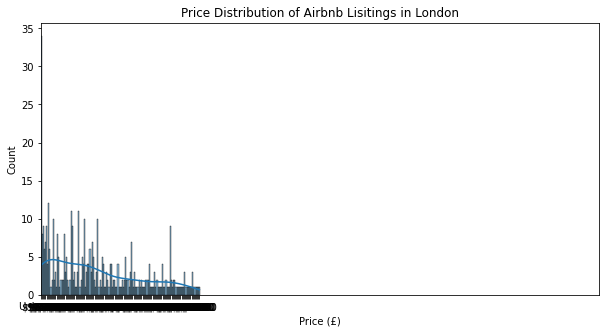

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_cleaned['price'], bins = 50, kde = True)
plt.title("Price Distribution of Airbnb Lisitings in London")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.xlim(0, 500)
plt.show()

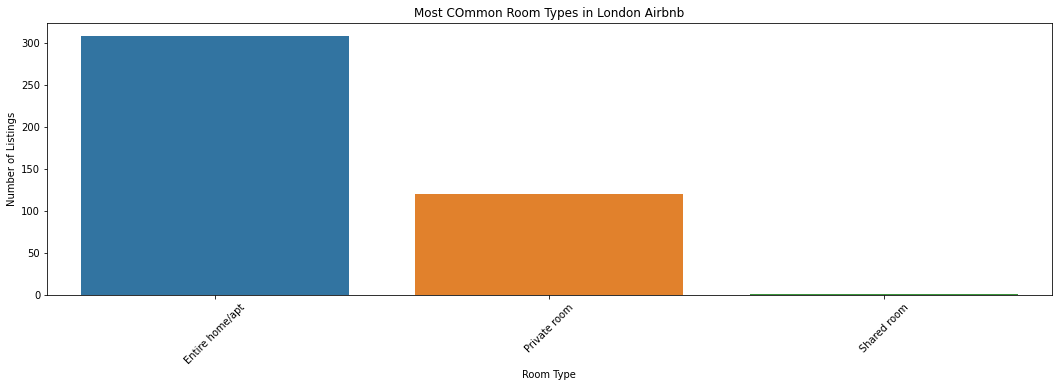

In [22]:
# now will find the most preferred room in London
room_counts = df_cleaned['room_type'].value_counts()
plt.figure(figsize= (18,5))
sns.barplot(x=room_counts.index, y=room_counts.values)
plt.title("Most COmmon Room Types in London Airbnb")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

In [25]:
df.head()


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20250105040826,2025-01-05,previous scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20250105040826,2025-01-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.42
2,5651579,https://www.airbnb.com/rooms/5651579,20250105040826,2025-01-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.64,NaN,f,2,1,1,0,3.14
3,6623339,https://www.airbnb.com/rooms/6623339,20250105040826,2025-01-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.82
4,9005989,https://www.airbnb.com/rooms/9005989,20250105040826,2025-01-05,city scrape,"Studio in The heart of Center SQ, in Albany NY",(21 years of age or older ONLY) NON- SMOKING.....,"There are many shops, restaurants, bars, museu...",https://a0.muscache.com/pictures/d242a77e-437c...,17766924,...,4.93,4.87,4.78,NaN,f,1,1,0,0,5.90


In [26]:
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.290000e+02,4.290000e+02,4.290000e+02,429.000000,429.000000,0.0,429.000000,429.000000,429.000000,395.000000,...,374.000000,374.000000,374.000000,374.000000,0.0,429.000000,429.000000,429.000000,429.000000,374.000000
mean,6.691283e+17,2.025011e+13,2.367239e+08,29.067599,48.065268,NaN,42.657644,-73.776211,3.494172,1.202532,...,4.862112,4.870214,4.675508,4.729572,NaN,6.174825,4.379953,1.792541,0.002331,2.090936
std,4.945228e+17,0.000000e+00,1.909060e+08,149.370181,286.038942,NaN,0.009597,0.018662,2.566515,0.587081,...,0.278906,0.253123,0.367092,0.388818,NaN,6.409304,6.005657,3.636695,0.048280,2.079791
min,2.992450e+06,2.025011e+13,6.576000e+04,1.000000,1.000000,NaN,42.630660,-73.876490,1.000000,0.000000,...,2.000000,3.000000,3.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.050000
25%,5.157990e+07,2.025011e+13,4.762598e+07,2.000000,2.000000,NaN,42.652220,-73.788280,2.000000,1.000000,...,4.850000,4.860000,4.520000,4.670000,NaN,1.000000,1.000000,0.000000,0.000000,0.550000
50%,8.038680e+17,2.025011e+13,1.923130e+08,4.000000,5.000000,NaN,42.656790,-73.772870,2.000000,1.000000,...,4.945000,4.960000,4.810000,4.830000,NaN,3.000000,2.000000,0.000000,0.000000,1.405000
75%,1.102984e+18,2.025011e+13,3.920749e+08,12.000000,15.000000,NaN,42.662610,-73.763250,4.000000,1.000000,...,5.000000,5.000000,4.930000,4.940000,NaN,8.000000,5.000000,1.000000,0.000000,3.017500
max,1.325491e+18,2.025011e+13,6.671428e+08,1212.000000,2405.000000,NaN,42.714900,-73.738250,16.000000,7.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,23.000000,23.000000,13.000000,1.000000,11.270000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            429 non-null    int64  
 1   listing_url                                   429 non-null    object 
 2   scrape_id                                     429 non-null    int64  
 3   last_scraped                                  429 non-null    object 
 4   source                                        429 non-null    object 
 5   name                                          429 non-null    object 
 6   description                                   422 non-null    object 
 7   neighborhood_overview                         213 non-null    object 
 8   picture_url                                   429 non-null    object 
 9   host_id                                       429 non-null    int

In [29]:
neighbourhood_prices = df_cleaned.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=neighbourhood_prices.index, y=neighbourhood_prices.values)
plt.title("Top 10 Most Expensive Neighbourhoods in London")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.show()


DataError: No numeric types to aggregate

In [30]:
print(df_cleaned["price"].dtype)

object


In [31]:
print(df_cleaned["price"])

0      Unknown
1      $115.00
2       $75.00
3      $115.00
4       $85.00
        ...   
424     $56.00
425     $49.00
426    $250.00
427     $73.00
428     $96.00
Name: price, Length: 429, dtype: object


In [32]:
# Convert "price" to numeric (remove non-numeric characters if needed)
df_cleaned["price"] = df_cleaned["price"].astype(str).str.replace("[^0-9.]", "", regex=True).astype(float)


ValueError: could not convert string to float: 

In [33]:
print(df_cleaned["price"].unique()[:20])  # Show first 20 unique values


['Unknown' '$115.00' '$75.00' '$85.00' '$65.00' '$50.00' '$180.00'
 '$55.00' '$45.00' '$219.00' '$184.00' '$70.00' '$275.00' '$106.00'
 '$136.00' '$80.00' '$40.00' '$570.00' '$69.00' '$35.00']


In [34]:
# Convert 'price' to numeric, removing non-numeric characters
df_cleaned["price"] = (
    df_cleaned["price"]
    .astype(str)  # Ensure all values are treated as strings
    .str.replace(r"[^0-9.]", "", regex=True)  # Remove all characters except numbers and decimal points
    .replace("", "0")  # Replace empty values with 0 (optional, depending on your dataset)
    .astype(float)  # Convert cleaned values to float
)


In [35]:
print(df_cleaned["price"].dtype)  # Should print "float64"
print(df_cleaned["price"].head())  # Check if values look correct


float64
0      0.0
1    115.0
2     75.0
3    115.0
4     85.0
Name: price, dtype: float64


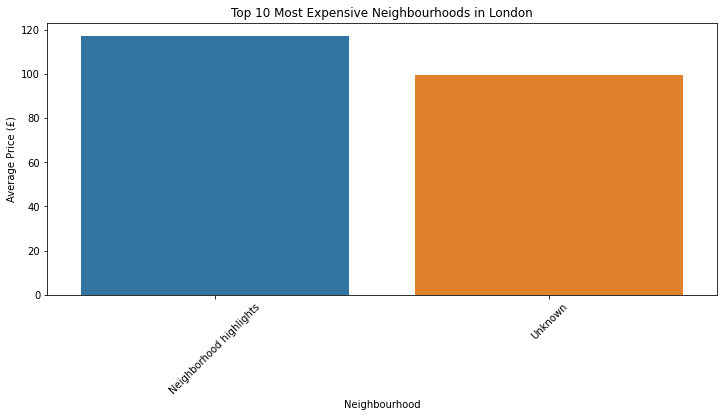

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighbourhood and calculate the mean price
neighbourhood_prices = df_cleaned.groupby("neighbourhood")["price"].mean().sort_values(ascending=False).head(10)

# Plot the bar chart
plt.figure(figsize=(12,5))
sns.barplot(x=neighbourhood_prices.index, y=neighbourhood_prices.values)
plt.title("Top 10 Most Expensive Neighbourhoods in London")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.show()


In [43]:
print(df_cleaned["neighbourhood"].value_counts())


Unknown                    216
Neighborhood highlights    213
Name: neighbourhood, dtype: int64


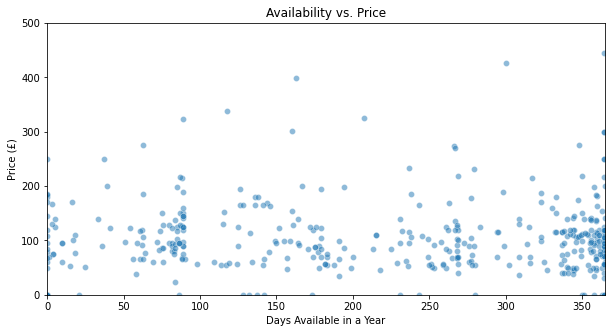

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df_cleaned['availability_365'], y=df_cleaned['price'], alpha=0.5)

plt.title("Availability vs. Price")
plt.xlabel("Days Available in a Year")
plt.ylabel("Price (£)")
plt.xlim(0, 365)  # Restrict x-axis to 0-365 days
plt.ylim(0, 500)  # Restrict y-axis to remove extreme values

plt.show()


In [47]:
print(df_cleaned.columns)

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
     

In [54]:
print(df_cleaned["availability_365"].dtype)
df_cleaned["availability_365"].fillna(0, inplace=True)
print(df_cleaned["availability_365"].isnull().sum())
print(df_cleaned["availability_365"].unique()[:20])

int64
0
[280 294   4 337 355  56   0 365 218 363 350 344 114 316 345 183 348 346
 359 191]


In [52]:
df_cleaned["availability_365"] = pd.to_numeric(df_cleaned["availability_365"], errors="coerce")


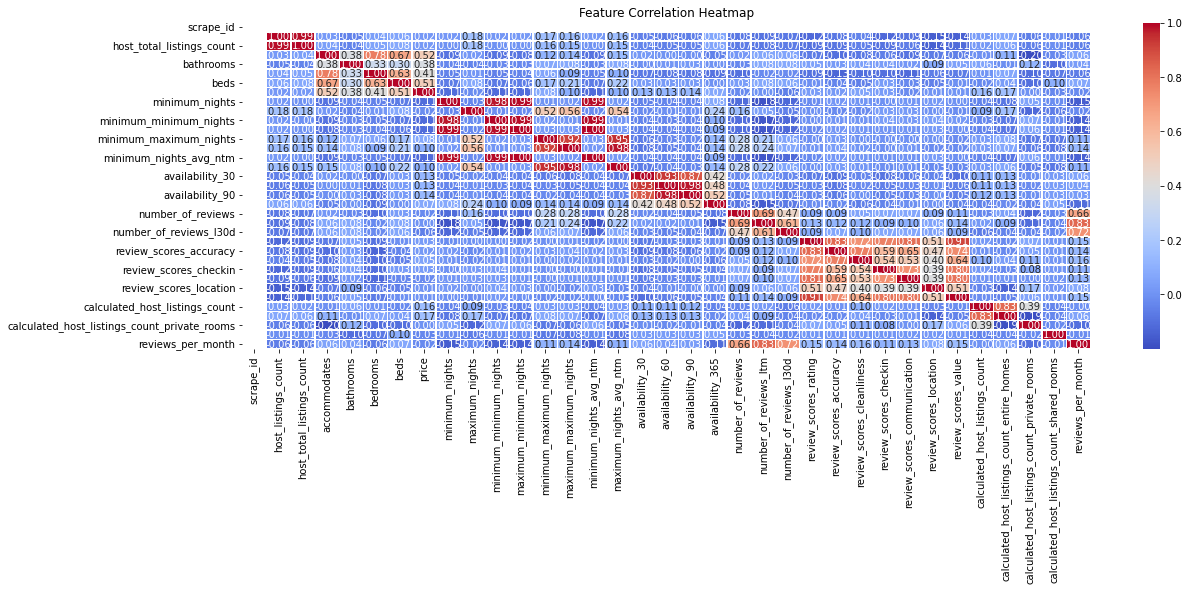

In [59]:

plt.figure(figsize=(19,6))

# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


In [57]:
print("availability_365" in df_cleaned.columns)


True


In [58]:
df_cleaned["availability_365"] = pd.to_numeric(df_cleaned["availability_365"], errors="coerce")


In [60]:
df_cleaned.to_csv("AirBnb_London_ACleaned.csv", index = False)